# Portfolio Allocation and Sharpe Ratio

In [15]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
plt.rcParams['font.size'] = 20

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [4]:
aapl = quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date=start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)

In [5]:
for df in [aapl, cisco, ibm, amzn]:
    df['Normed Return'] = df['Adj. Close'] / df.iloc[0]['Adj. Close']

## Allocations

$1M allocated as follows:

* 30% in Apple
* 20% in Cisco
* 40% in IBM
* 10% in Amazon

In [21]:
for df, w in zip([aapl, cisco, ibm, amzn], [0.3, 0.2, 0.4, 0.1]):
    df['Allocation'] = df['Normed Return'] * w

In [22]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [23]:
for df in [aapl, cisco, ibm, amzn]:
    df['Position Values'] = df['Allocation'] * 1e6

In [24]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [25]:
portfolio = pd.concat([
    aapl['Position Values'],
    cisco['Position Values'],
    ibm['Position Values'],
    amzn['Position Values']
], axis=1)

portfolio.columns = [
    'AAPL Postion', 
    'CSCO Postion', 
    'IBM Postion',
    'AMZN Postion'
]

portfolio['Total Position'] = portfolio.sum(axis=1)

portfolio.head()

,AAPL Postion,CSCO Postion,IBM Postion,AMZN Postion,Total Position
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


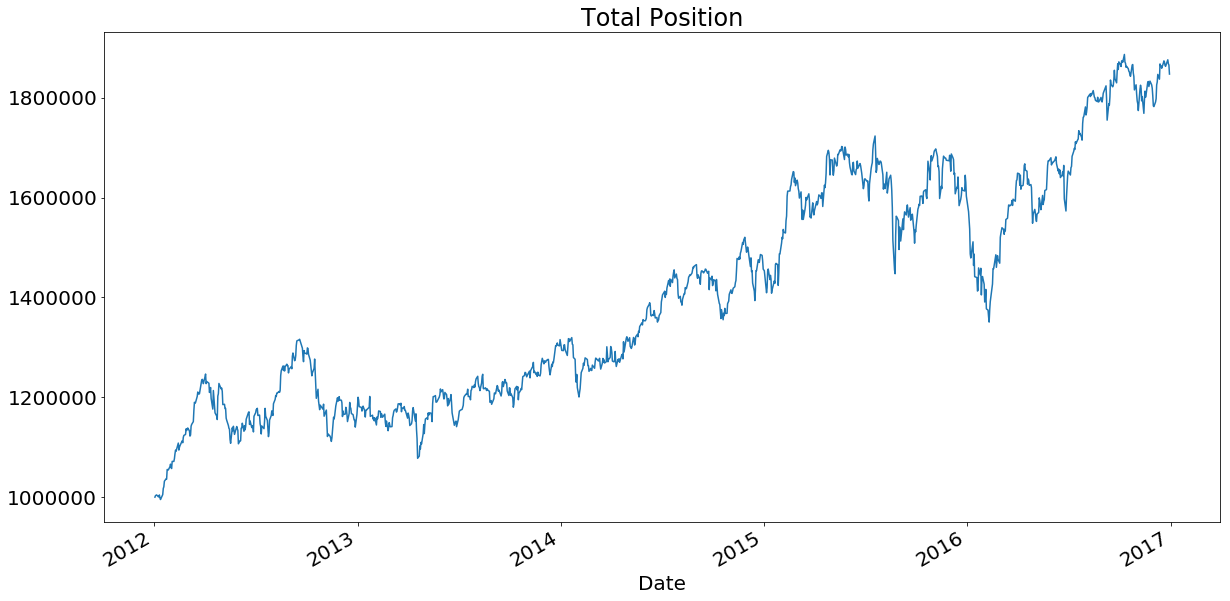

In [26]:
portfolio['Total Position'].plot(
    figsize=(20, 10),
    title='Total Position'
);

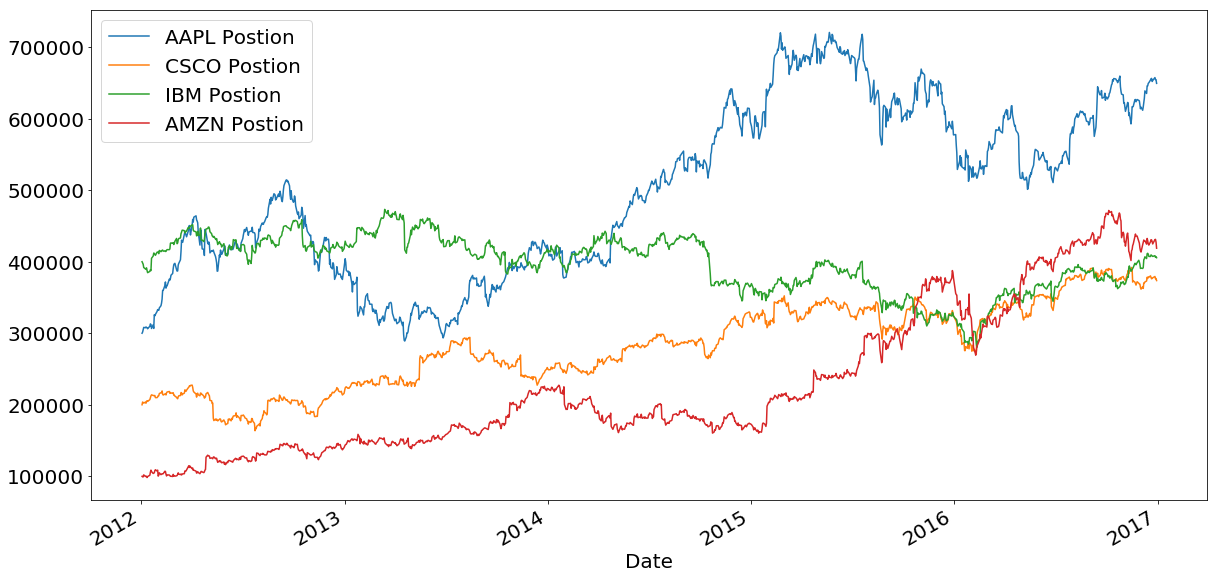

In [27]:
portfolio.drop('Total Position', axis=1).plot(
    figsize=(20, 10)
);

## Portfolio Statistics

#### Daily Returns

In [28]:
portfolio['Daily Return'] = portfolio['Total Position'].pct_change(1)

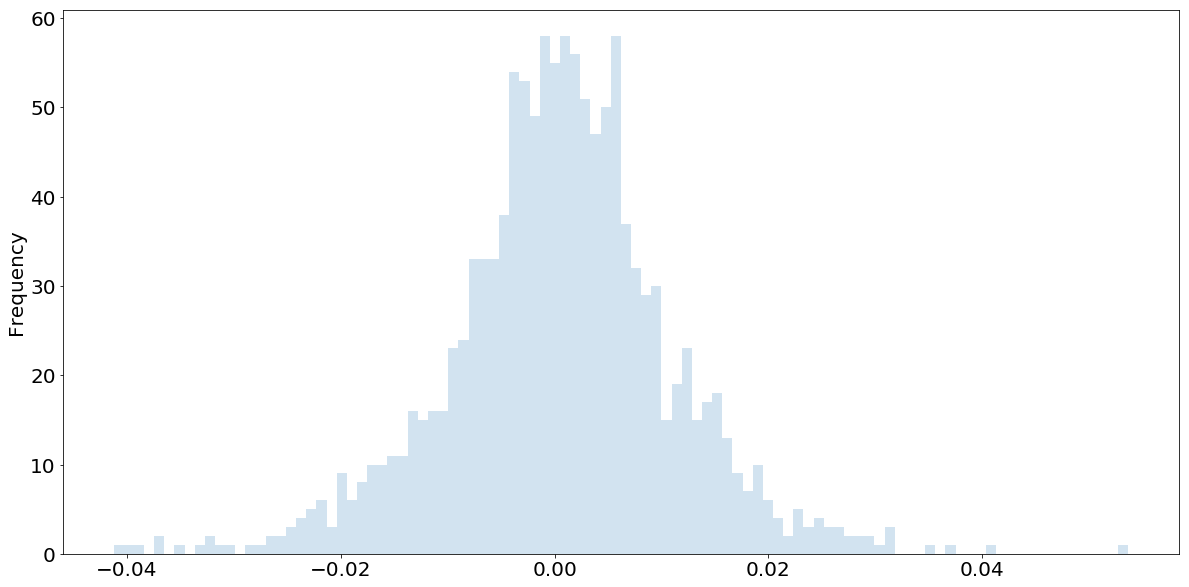

In [34]:
portfolio['Daily Return'].plot(
    kind='hist',
    bins=100,
    figsize=(20, 10),
    alpha=0.2
);

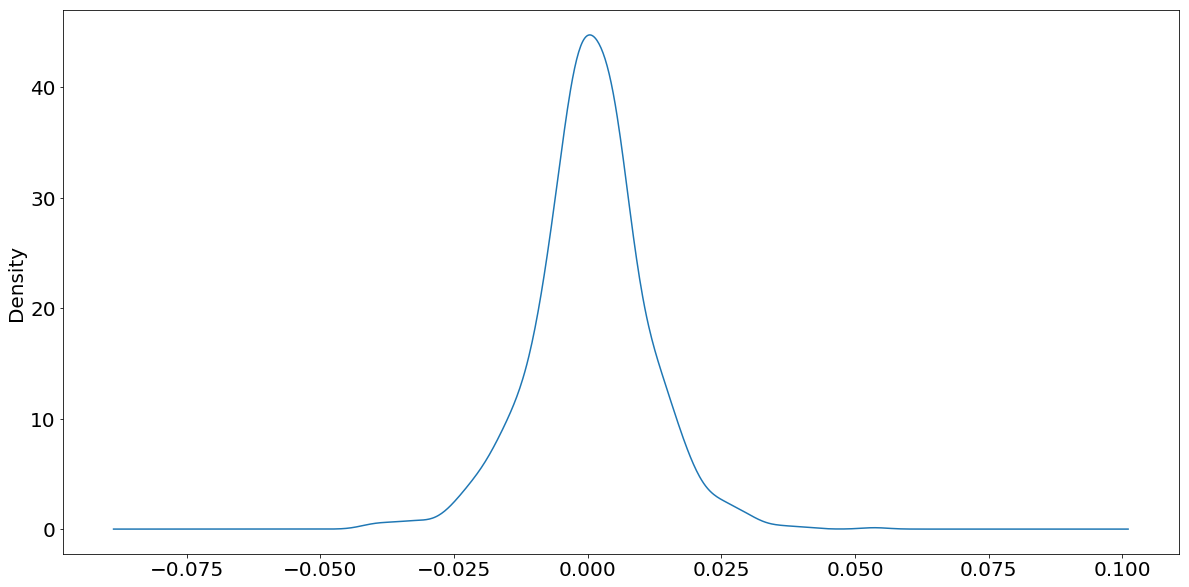

In [33]:
portfolio['Daily Return'].plot(
    kind='kde',
    figsize=(20, 10)
);

#### Cumulative Return (Overall)

In [38]:
cumulative_return = portfolio['Total Position'][-1] / portfolio['Total Position'][0]
cumulative_return -= 1
print('%.2f%%' % (cumulative_return * 100))

84.74%


#### [Sharpe Ratio](http://www.investopedia.com/terms/s/sharperatio)

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

Use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

A ratio higher than 1 is considered "good". A ratio higher than 2 is considered "excellent".

In [39]:
SR = portfolio['Daily Return'].mean() / portfolio['Daily Return'].std()
print('%.3f' % SR)

0.051


#### Annualised Sharpe Ratio

In [41]:
k = (252**0.5) # because of daily sampling rate
ASR = SR * k
print('%.3f' % ASR)

0.817
